In [1]:
library("e1071")
attach(iris)
x <- subset(iris, select=-Species)
y <- Species


Warning message:
"package 'e1071' was built under R version 3.4.2"

In [2]:
svm_model <- svm(Species ~ ., data=iris, cost=100)
summary(svm_model)
varImp(svm_model, scale=FALSE)


Call:
svm(formula = Species ~ ., data = iris, cost = 100)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.25 

Number of Support Vectors:  28

 ( 6 10 12 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




ERROR: Error in varImp(svm_model, scale = FALSE): could not find function "varImp"


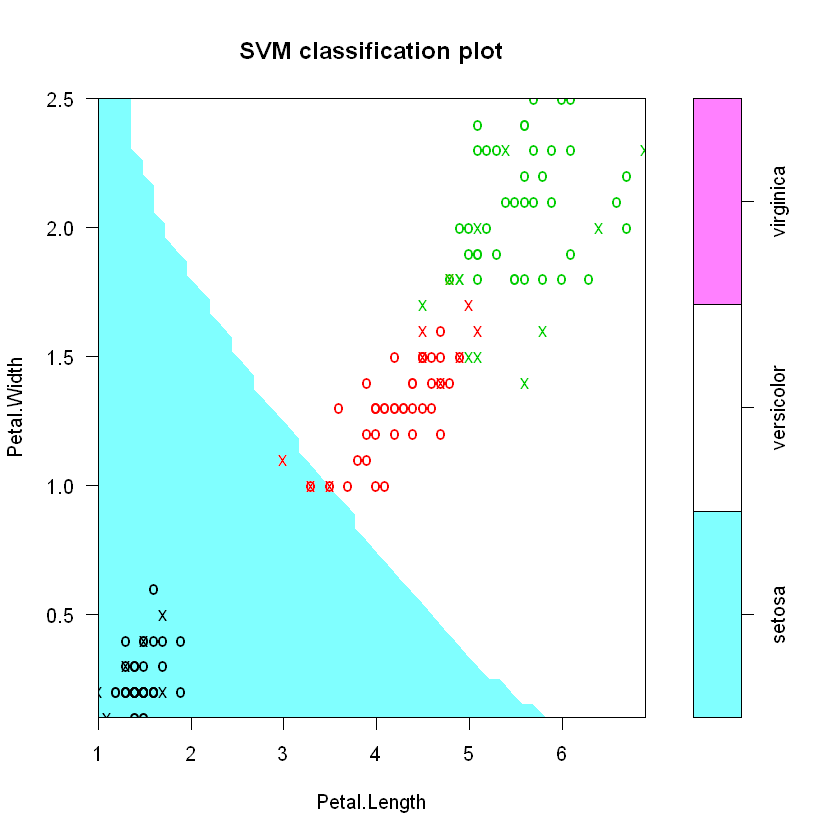

In [3]:
plot(svm_model, iris,
     Petal.Width ~ Petal.Length,
     slice = list(Sepal.Width = 3, Sepal.Length = 4))

In [4]:
pred <- predict(svm_model, head(iris), decision.values = TRUE)
pred


1      2      3      4      5      6 
setosa setosa setosa setosa setosa setosa 
attr(,"decision.values")
  setosa/versicolor setosa/virginica versicolor/virginica
1          1.191174         1.090842             1.694271
2          1.133656         1.061954             1.625626
3          1.208506         1.069810             1.367942
4          1.164615         1.050592             1.413238
5          1.188081         1.095035             1.595680
6          1.099076         1.098463             2.172864
Levels: setosa versicolor virginica

In [5]:
svm_model1 <- svm(x,y)
summary(svm_model1)


Call:
svm.default(x = x, y = y)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  51

 ( 8 22 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [6]:
pred <- predict(svm_model1,x)
system.time(pred <- predict(svm_model1,x))

   user  system elapsed 
      0       0       0 

In [7]:
table(pred,y)

            y
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

In [8]:
svm_tune <- tune(svm, train.x=x, train.y=y, 
              kernel="radial", ranges=list(cost=10^(-1:2), gamma=c(.5,1,2)))

print(svm_tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.04 



In [9]:
svm_model_after_tune <- svm(Species ~ ., data=iris, kernel="radial", cost=100, gamma=0.5)
summary(svm_model_after_tune)



Call:
svm(formula = Species ~ ., data = iris, kernel = "radial", cost = 100, 
    gamma = 0.5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.5 

Number of Support Vectors:  46

 ( 11 13 22 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [10]:
pred <- predict(svm_model_after_tune,x)
system.time(predict(svm_model_after_tune,x))

   user  system elapsed 
      0       0       0 

In [11]:
table(pred,y)

            y
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         50         0
  virginica       0          0        50